In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from scipy import stats as st

In [8]:
files = [
    "Similarities/similarities_objective.csv",
    "Similarities/similarities_subjective.csv",
]

In [55]:
# Load data
df_objective = pd.read_csv(files[0])
df_subjective = pd.read_csv(files[1])
df_test = pd.read_csv("Similarities/similarities_objective_temp_02.csv")

# drop first column
df_objective = df_objective.drop(columns=df_objective.columns[0])
# Remove random row
df_objective = df_objective.drop(np.random.randint(0, len(df_objective)))


df_subjective = df_subjective.drop(columns=df_subjective.columns[0])
df_test = df_test.drop(columns=df_test.columns[0])

# Change column names
df_objective.columns = ["Jaccard Ranked", "Jaccard Unranked"]
df_subjective.columns = ["Jaccard Ranked", "Jaccard Unranked"]
df_test.columns = ["Jaccard Ranked", "Jaccard Unranked"]
df_test

,Jaccard Ranked,Jaccard Unranked
0,0.739339,0.937190
1,0.658581,0.807393
2,0.836364,1.000000
3,0.857851,0.897521
4,0.850350,0.873826
...,...,...
129,0.607869,0.747271
130,0.807273,1.000000
131,0.389353,0.601047
132,0.752048,0.752048


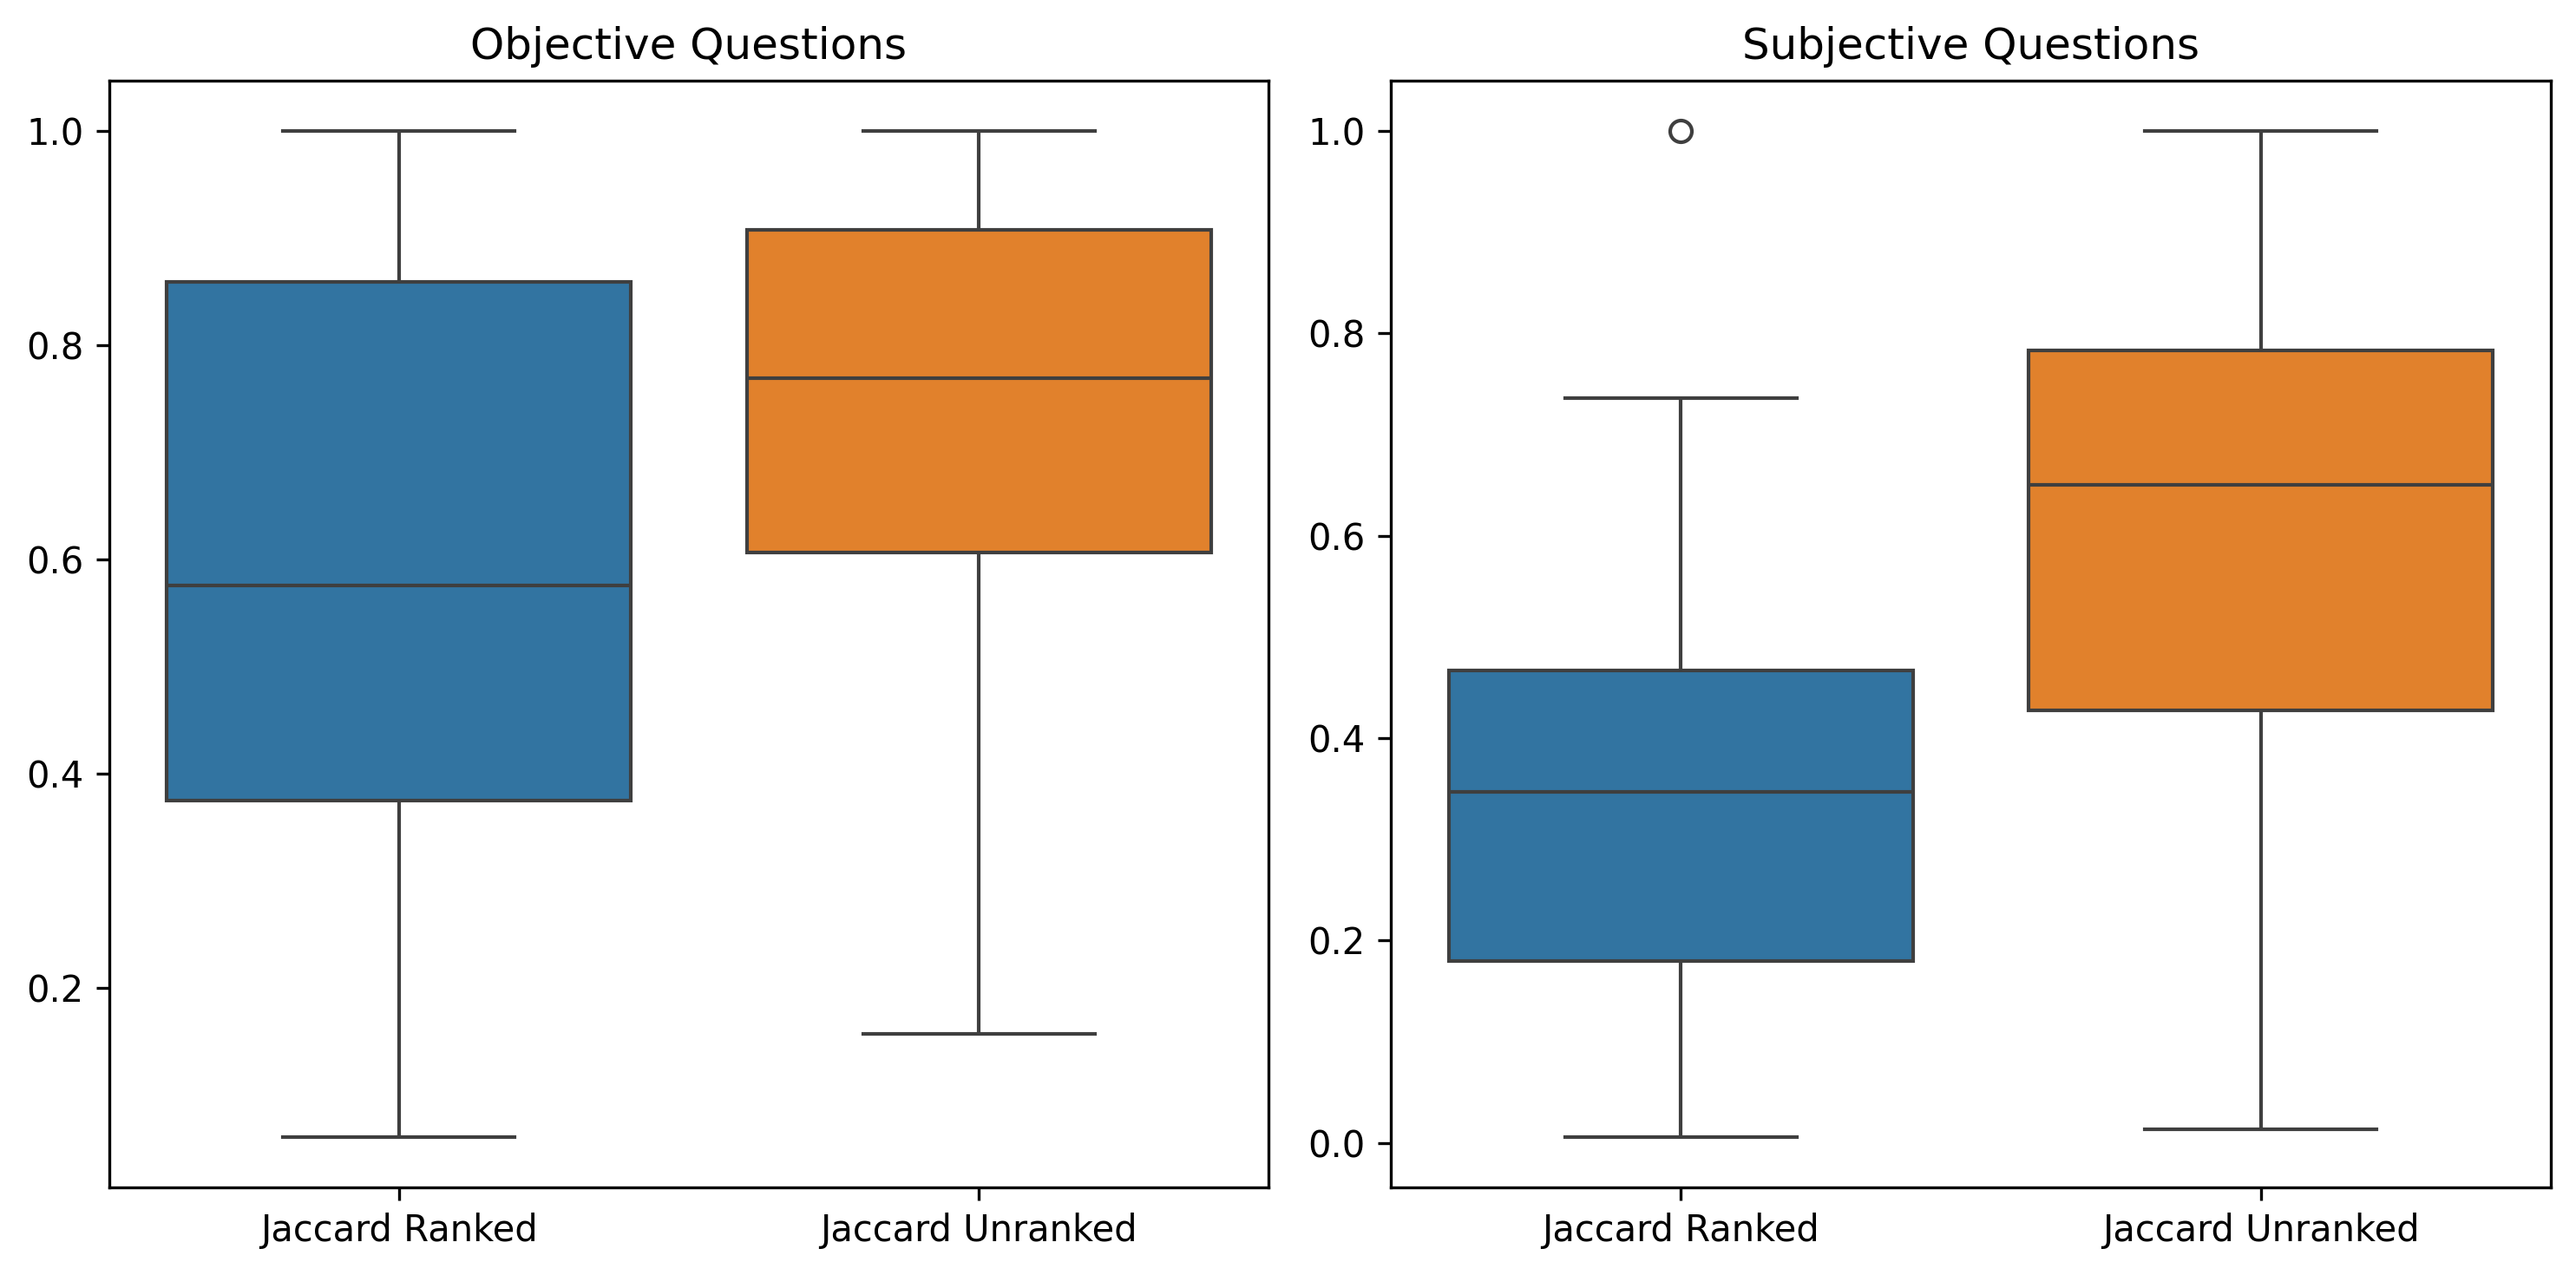

In [10]:
# Boxplor of objective and subjective similarities

fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi = 300)
sns.boxplot(data=df_objective, ax=ax[0])
ax[0].set_title("Objective Questions")
sns.boxplot(data=df_subjective, ax=ax[1])
ax[1].set_title("Subjective Questions")

plt.tight_layout()
plt.savefig("Images\Similarities_boxplot.png")
plt.show()

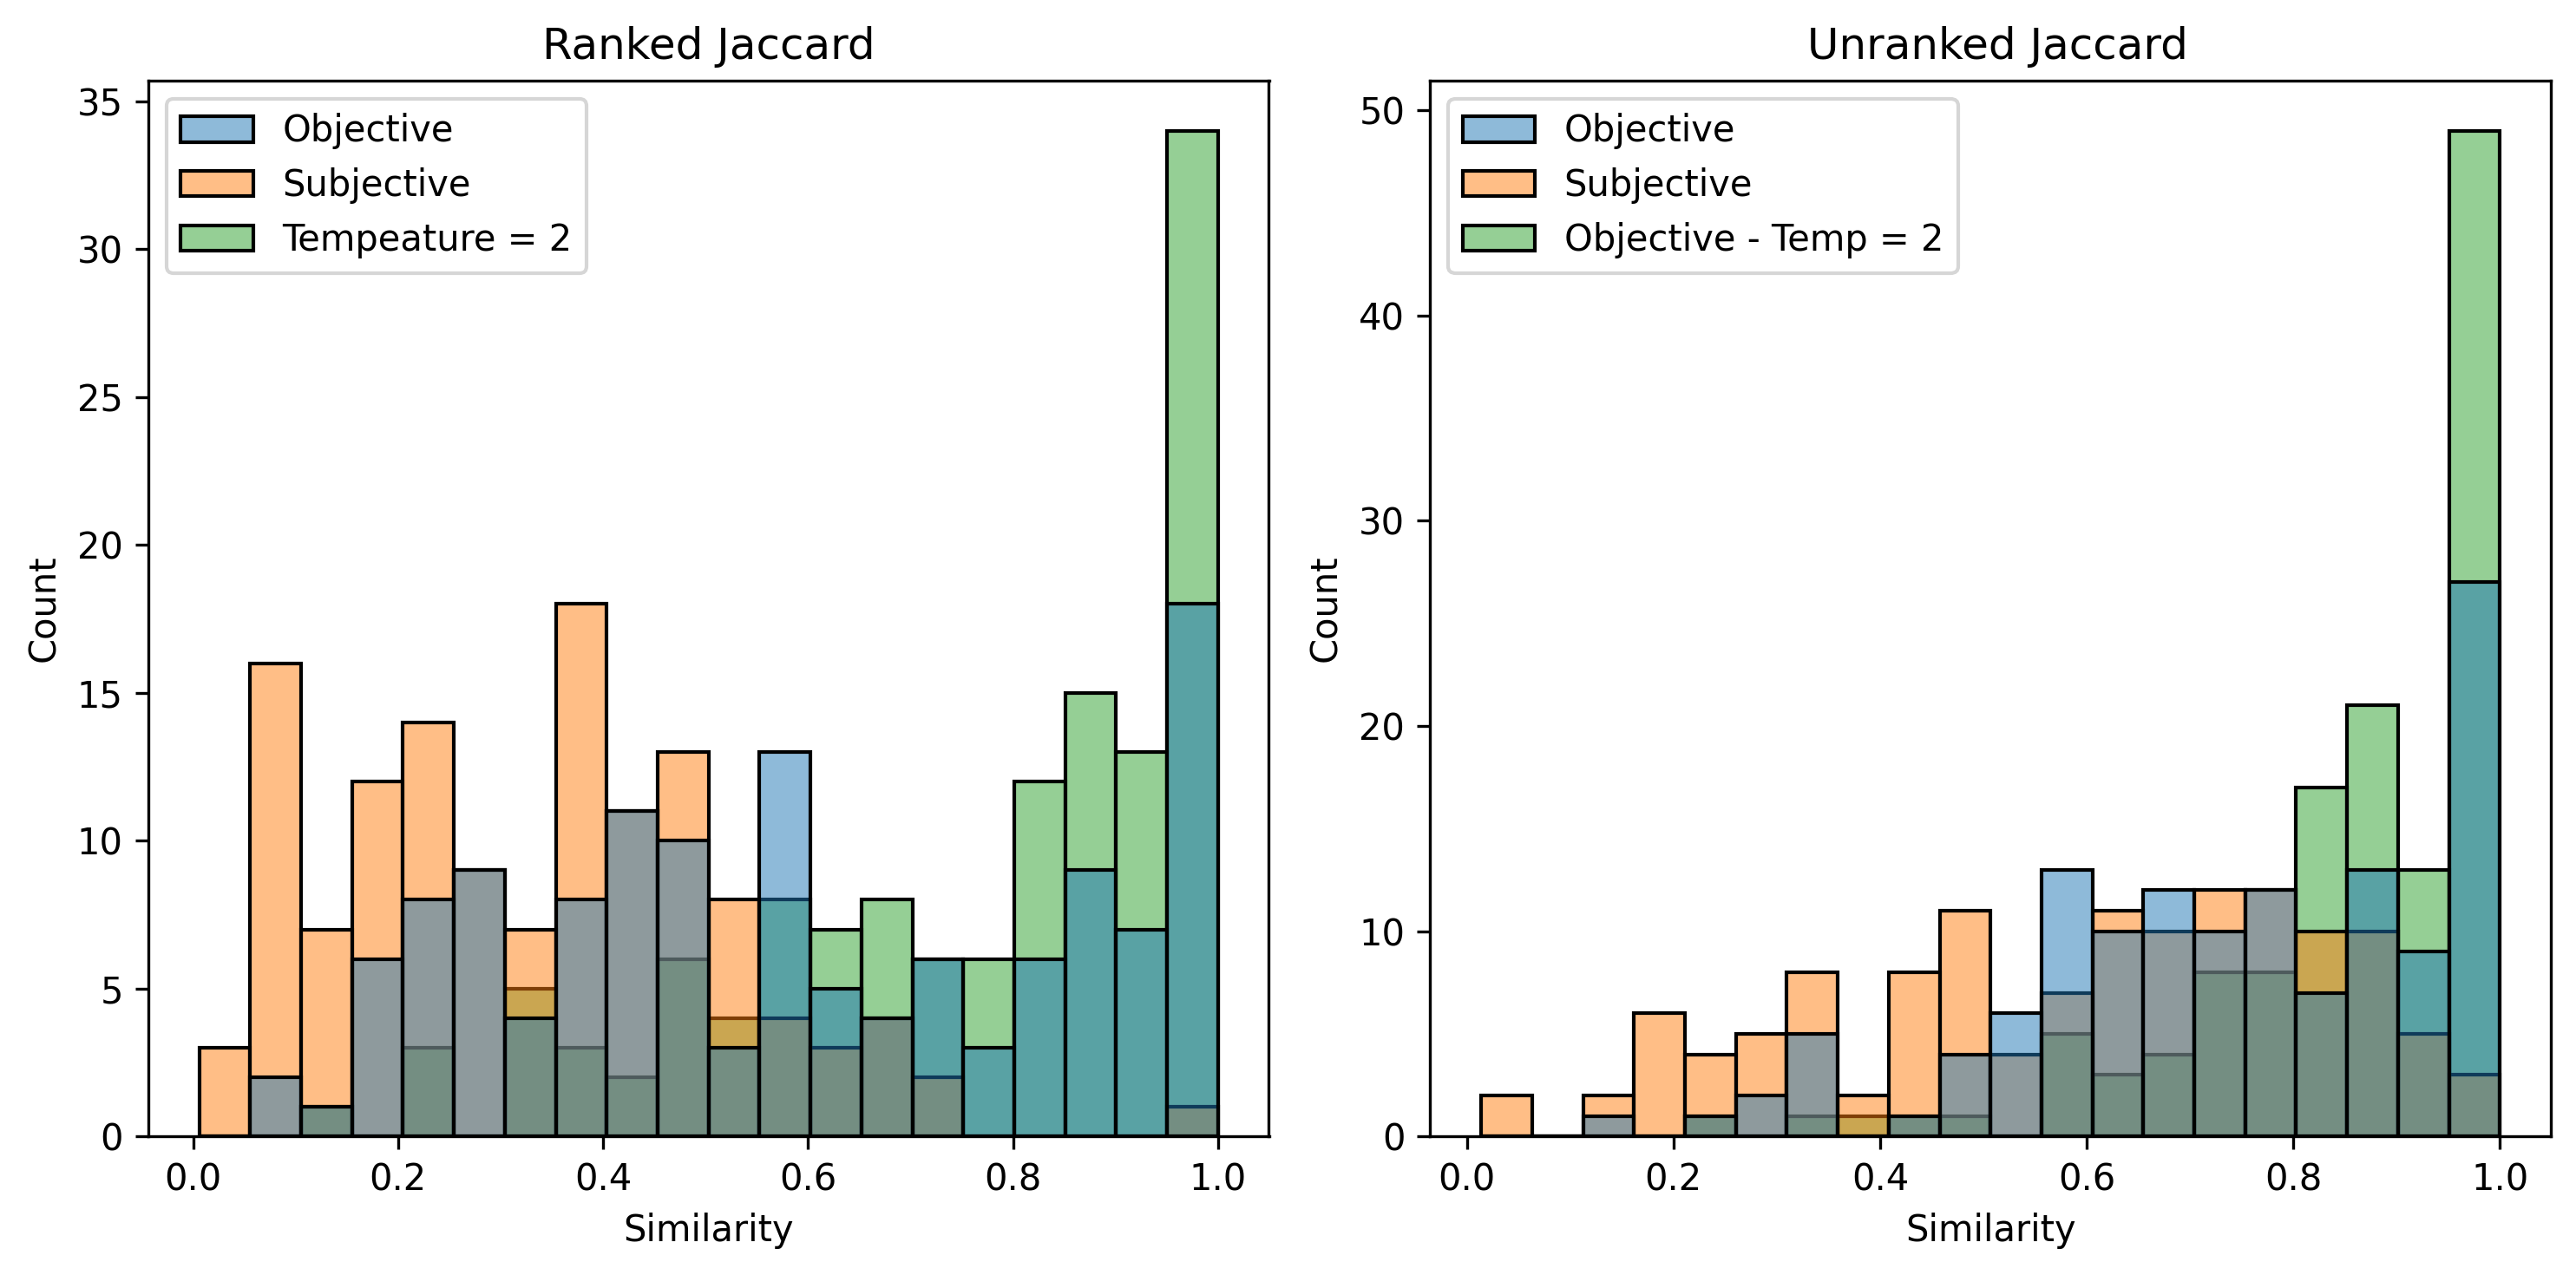

In [75]:
# create a new df with jaccard ranked from objective and subjective and jaccard unranked from objective and subjective
df_ranked = pd.DataFrame()
df_ranked["Objective"] = df_objective["Jaccard Ranked"]
df_ranked["Subjective"] = df_subjective["Jaccard Ranked"]
df_ranked["Tempeature = 2"] = df_test["Jaccard Ranked"]

df_unranked = pd.DataFrame()
df_unranked["Objective"] = df_objective["Jaccard Unranked"]
df_unranked["Subjective"] = df_subjective["Jaccard Unranked"]
df_unranked["Objective - Temp = 2"] = df_test["Jaccard Unranked"]


fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi = 300)
sns.histplot(df_ranked, bins=20, ax=ax[0])
ax[0].set_title("Ranked Jaccard")
ax[0].set_xlabel("Similarity")

sns.histplot(df_unranked, bins=20, ax=ax[1])
ax[1].set_title(" Unranked Jaccard")
ax[1].set_xlabel("Similarity")


# fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi = 300)
# sns.histplot(df_objective, bins=20, ax=ax[0])
# ax[0].set_title("Objective Questions")
# ax[0].set_xlabel("Similarity")
# sns.histplot(df_subjective, bins=20, ax=ax[1])
# ax[1].set_title("Subjective Questions")
# ax[1].set_xlabel("Similarity")

plt.tight_layout()
plt.savefig("Similarities_histogram.png")

plt.show()

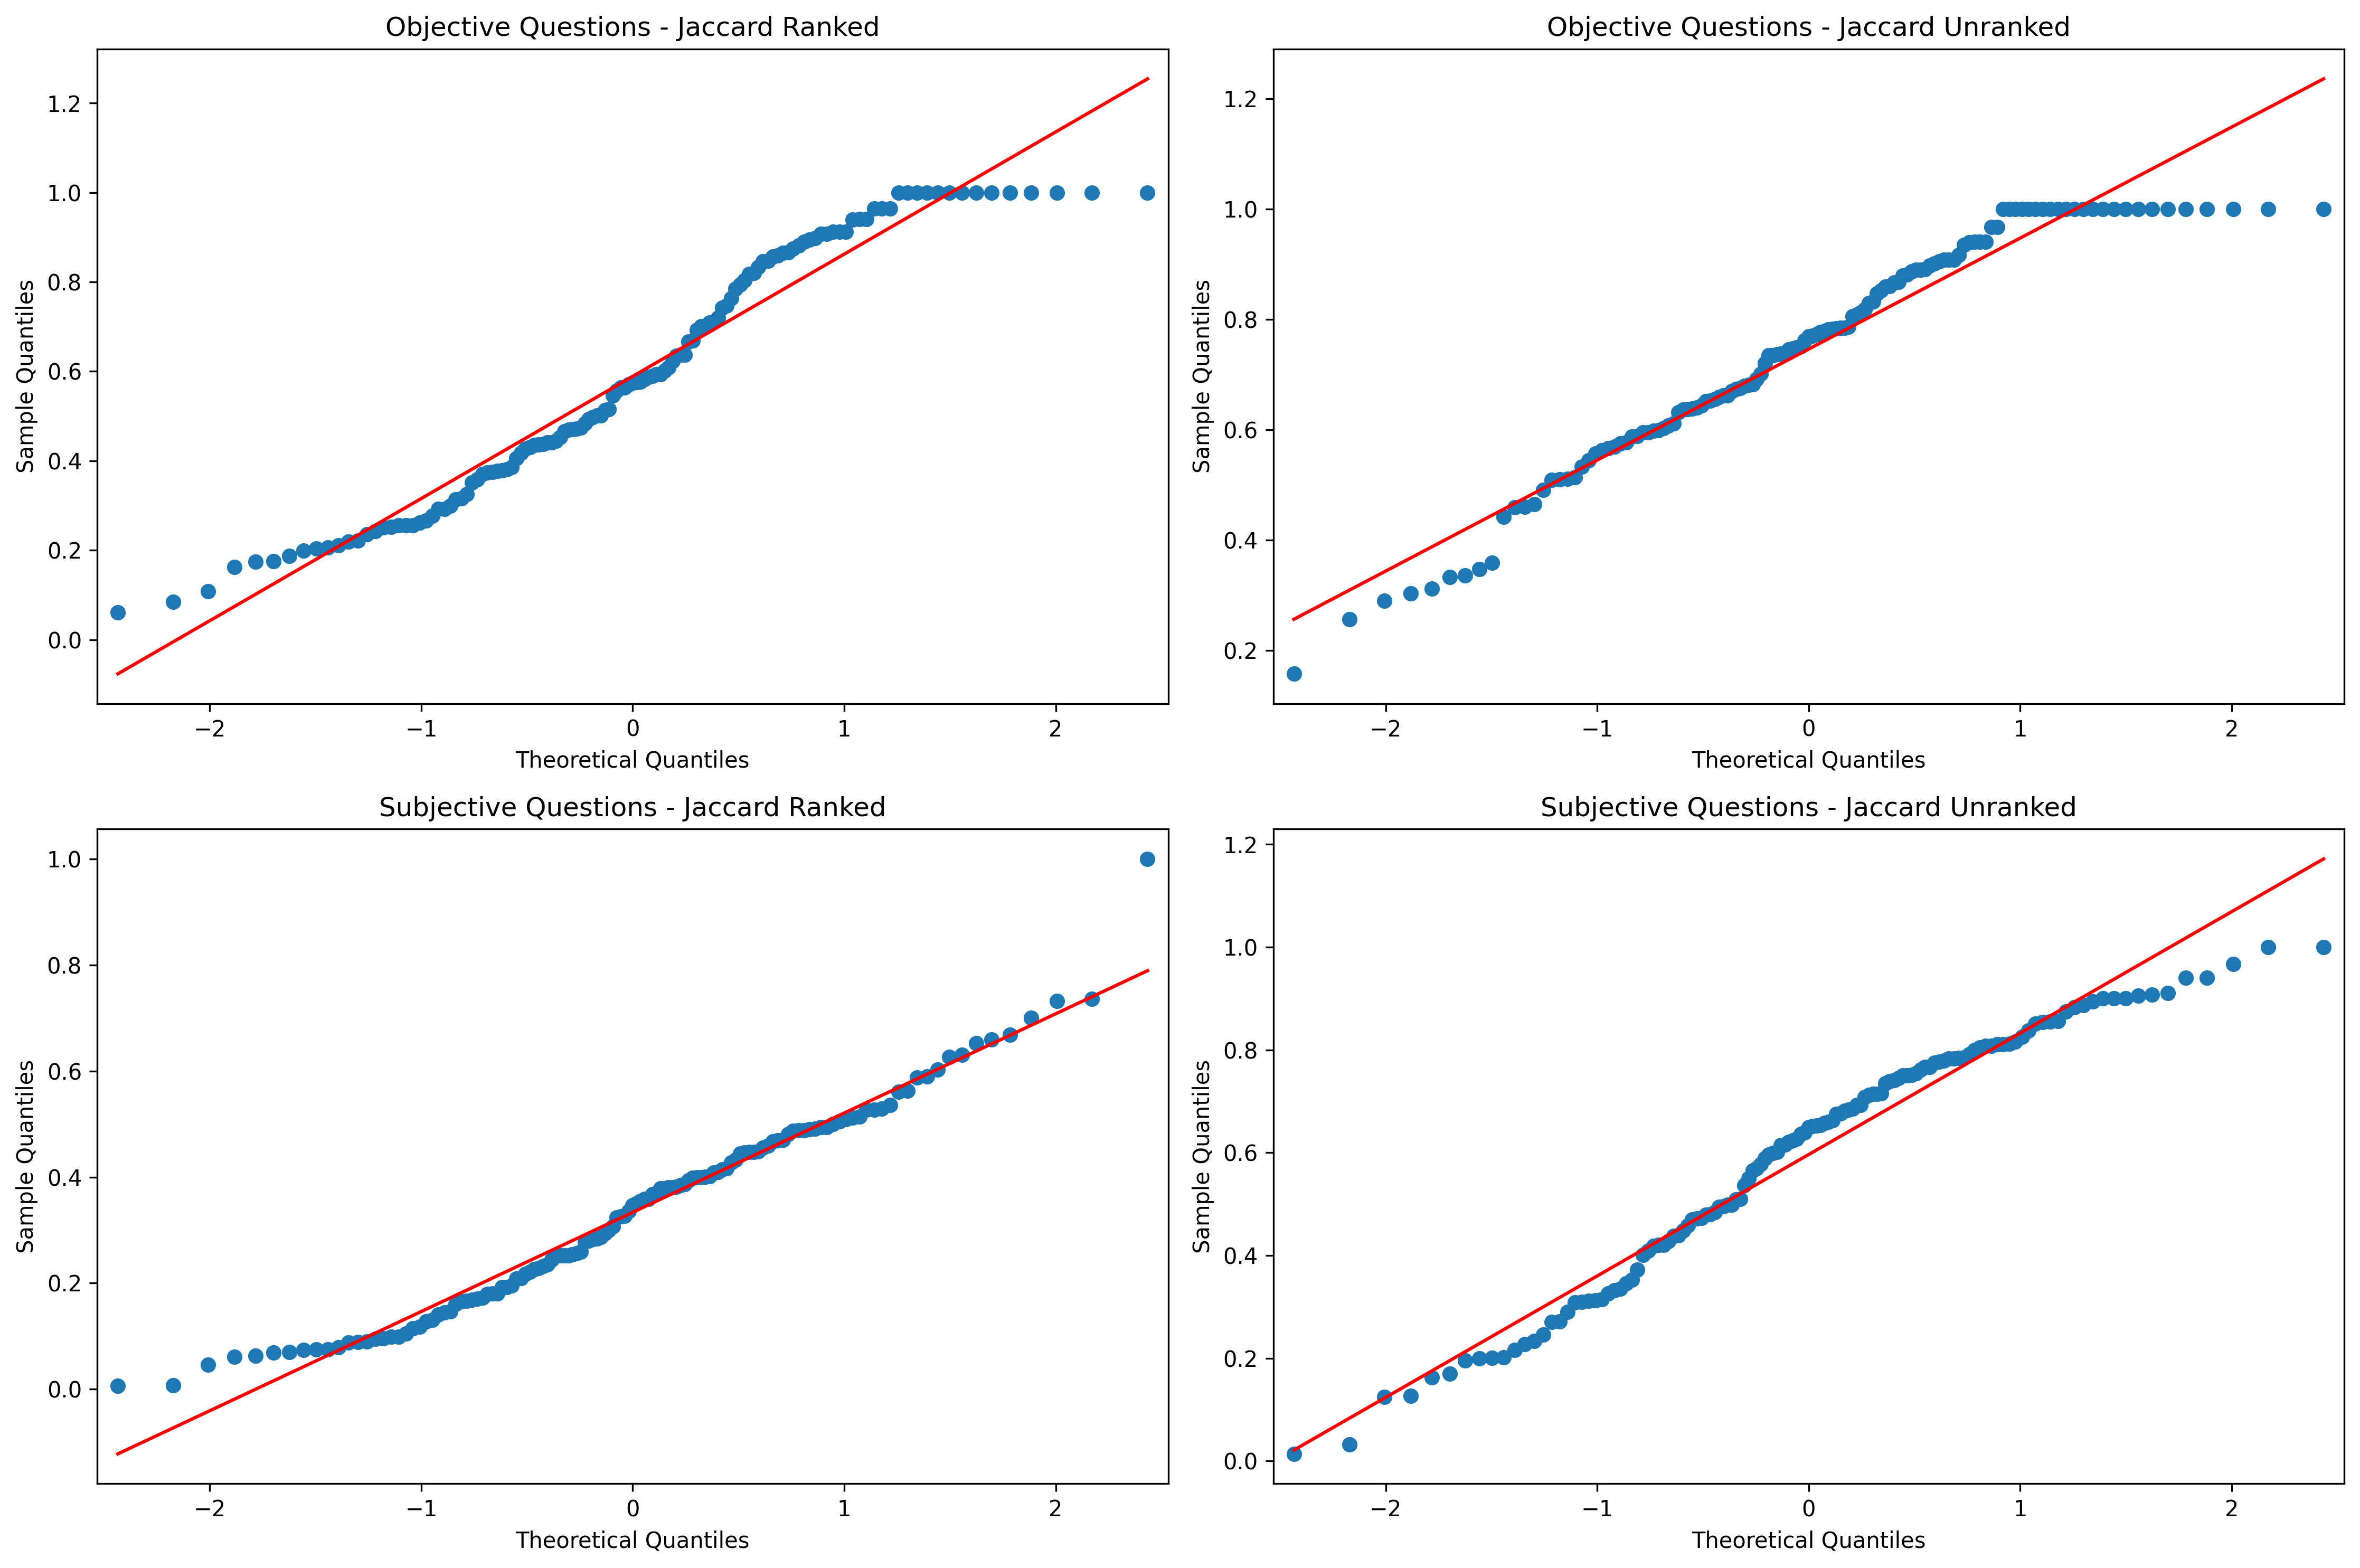

In [158]:
# PLotting a QQ-plot for the accuracy scores for the diffrent models in subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10), dpi=300)
sm.qqplot(df_objective["Jaccard Ranked"], line="r", ax=ax[0, 0])
ax[0, 0].set_title("Objective Questions - Jaccard Ranked")
sm.qqplot(df_objective["Jaccard Unranked"], line="r", ax=ax[0, 1])
ax[0, 1].set_title("Objective Questions - Jaccard Unranked")
sm.qqplot(df_subjective["Jaccard Ranked"], line="r", ax=ax[1, 0])
ax[1, 0].set_title("Subjective Questions - Jaccard Ranked")
sm.qqplot(df_subjective["Jaccard Unranked"], line="r", ax=ax[1, 1])
ax[1, 1].set_title("Subjective Questions - Jaccard Unranked")

plt.tight_layout()
plt.savefig("Similarities_qqplot.png")
plt.show()

In [159]:
# Normality assumptions for the data
# Check for normality on the accury scores for the diffrent models, using different tests
print("Shapiro-Wilk test for normality")
print("\n")

# Print in nicer format using scientify notation with 3 decimals
def sci_not(x):
    return "{:.3e}".format(x)


# Objective questions
print("---Objective Questions---")
print("Jaccard Ranked")
print("Shapiro-Wilk p-value: ", sci_not(st.shapiro(df_objective["Jaccard Ranked"])[1]))
print("Jaccard Unranked")
print("Shapiro-Wilk p-value: ", sci_not(st.shapiro(df_objective["Jaccard Unranked"])[1]))

print("\n")
# Subjective questions
print("---Subjective Questions---")
print("Jaccard Ranked")
print("Shapiro-Wilk p-value: ", sci_not(st.shapiro(df_subjective["Jaccard Ranked"])[1]))
print("Jaccard Unranked")
print("Shapiro-Wilk p-value: ", sci_not(st.shapiro(df_subjective["Jaccard Unranked"])[1]))

Shapiro-Wilk test for normality


---Objective Questions---
Jaccard Ranked
Shapiro-Wilk p-value:  3.235e-05
Jaccard Unranked
Shapiro-Wilk p-value:  2.017e-05


---Subjective Questions---
Jaccard Ranked
Shapiro-Wilk p-value:  7.067e-03
Jaccard Unranked
Shapiro-Wilk p-value:  7.955e-04


In [200]:
# Wilcoxon signed-rank test between the two models (test the jaccard ranked against the jaccard ranked for both objective and subjective questions) and the jaccard unranked against the jaccard unranked for both objective and subjective questions
print("\n")
print("Wilcoxon signed-rank test")
print("\n")

# Objective questions
print("Jaccard Ranked")
stat, p_val = st.wilcoxon(df_objective["Jaccard Ranked"], df_subjective["Jaccard Ranked"])
print(f"p_value: {p_val:.3e}, statistic: {stat}")

print("Jaccard Unranked")
stat, p_val = st.wilcoxon(df_objective["Jaccard Unranked"], df_subjective["Jaccard Unranked"])
print(f"p_value: {p_val:.3e}, statistic: {stat}")

# Create a df with the p_values for the different tests
p_values = pd.DataFrame(
    {
        "Wilcoxon": [st.wilcoxon(df_objective["Jaccard Ranked"], df_subjective["Jaccard Ranked"])[1], st.wilcoxon(df_objective["Jaccard Unranked"], df_subjective["Jaccard Unranked"])[1]]
    },
    index=["Jaccard Ranked", "Jaccard Unranked"]
)
print(p_values.to_latex() )




Wilcoxon signed-rank test


Jaccard Ranked
p_value: 1.052e-11, statistic: 1428.0
Jaccard Unranked
p_value: 4.447e-06, statistic: 2412.0
\begin{tabular}{lr}
\toprule
 & Wilcoxon \\
\midrule
Jaccard Ranked & 0.000000 \\
Jaccard Unranked & 0.000004 \\
\bottomrule
\end{tabular}



In [97]:
# Create a df with means for both df and models
df_means = pd.DataFrame(columns=["Objective", "Subjective"], index=["Jaccard Ranked", "Jaccard Unranked"])
df_means["Objective"] = [df_objective["Jaccard Ranked"].mean(), df_objective["Jaccard Unranked"].mean()]
df_means["Subjective"] = [df_subjective["Jaccard Ranked"].mean(), df_subjective["Jaccard Unranked"].mean()]


print("\n")

print(df_means)
# Print latex table
print(df_means.to_latex())





                  Objective  Subjective
Jaccard Ranked     0.589050    0.333632
Jaccard Unranked   0.746402    0.596564
\begin{tabular}{lrr}
\toprule
 & Objective & Subjective \\
\midrule
Jaccard Ranked & 0.589050 & 0.333632 \\
Jaccard Unranked & 0.746402 & 0.596564 \\
\bottomrule
\end{tabular}



In [87]:
df_means.iloc[0, :]

Objective     0.589050
Subjective    0.333632
Name: Jaccard Ranked, dtype: float64

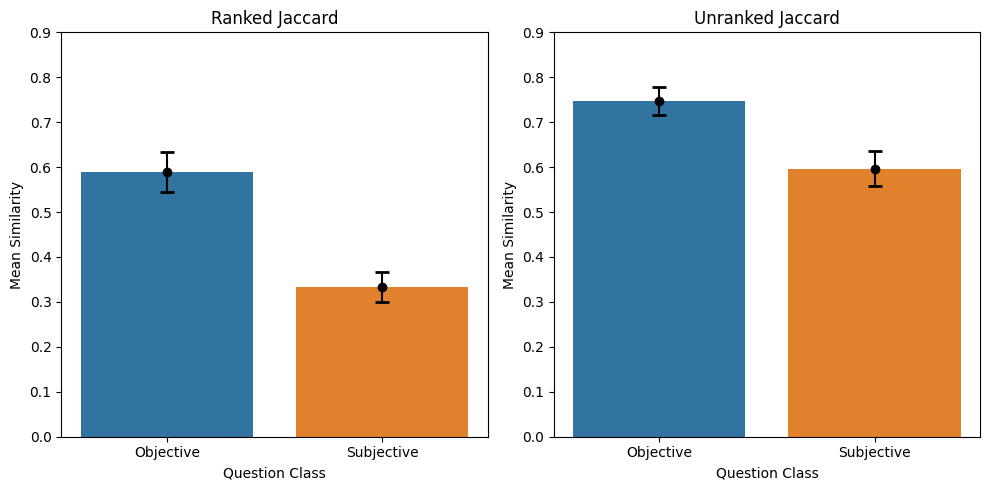

In [104]:
# Create a barplot with the means and confidence intervals based on mean and MOE values i give you in a list
subjective_ranked_MOE = 0.045 
subjective_unranked_MOE = 0.034 

objective_ranked_MOE = 0.031
objective_unranked_MOE = 0.039 

# plt errorbar with MOE
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# Make the two plots have same scale
ax[0].set_ylim(0, 0.9)
ax[1].set_ylim(0, 0.9)


sns.barplot(
    data=df_means,
    x=df_means.columns,
    y=df_means.iloc[1, :],
    ax=ax[1],
    hue=df_means.columns,
)
ax[1].set_title("Unranked Jaccard")
ax[1].errorbar(x=df_means.columns, y=df_means.iloc[1, :], yerr=[objective_ranked_MOE, objective_unranked_MOE], fmt='o', capsize=5, capthick=2, color='black')
ax[1].set_xlabel("Question Class")
ax[1].set_ylabel("Mean Similarity")

sns.barplot(
    data=df_means,
    x=df_means.columns,
    y=df_means.iloc[0, :],
    ax=ax[0],
    hue=df_means.columns,
)
ax[0].set_title("Ranked Jaccard")

ax[0].errorbar(
    x=df_means.columns,
    y=df_means.iloc[0, :],
    yerr=[subjective_ranked_MOE, subjective_unranked_MOE],
    fmt="o",
    capsize=5,
    capthick=2,
    color="black",
)
ax[0].set_xlabel("Question Class")
ax[0].set_ylabel("Mean Similarity")

plt.tight_layout()

plt.savefig("accuracy_confidence_intervals.png")
plt.show()

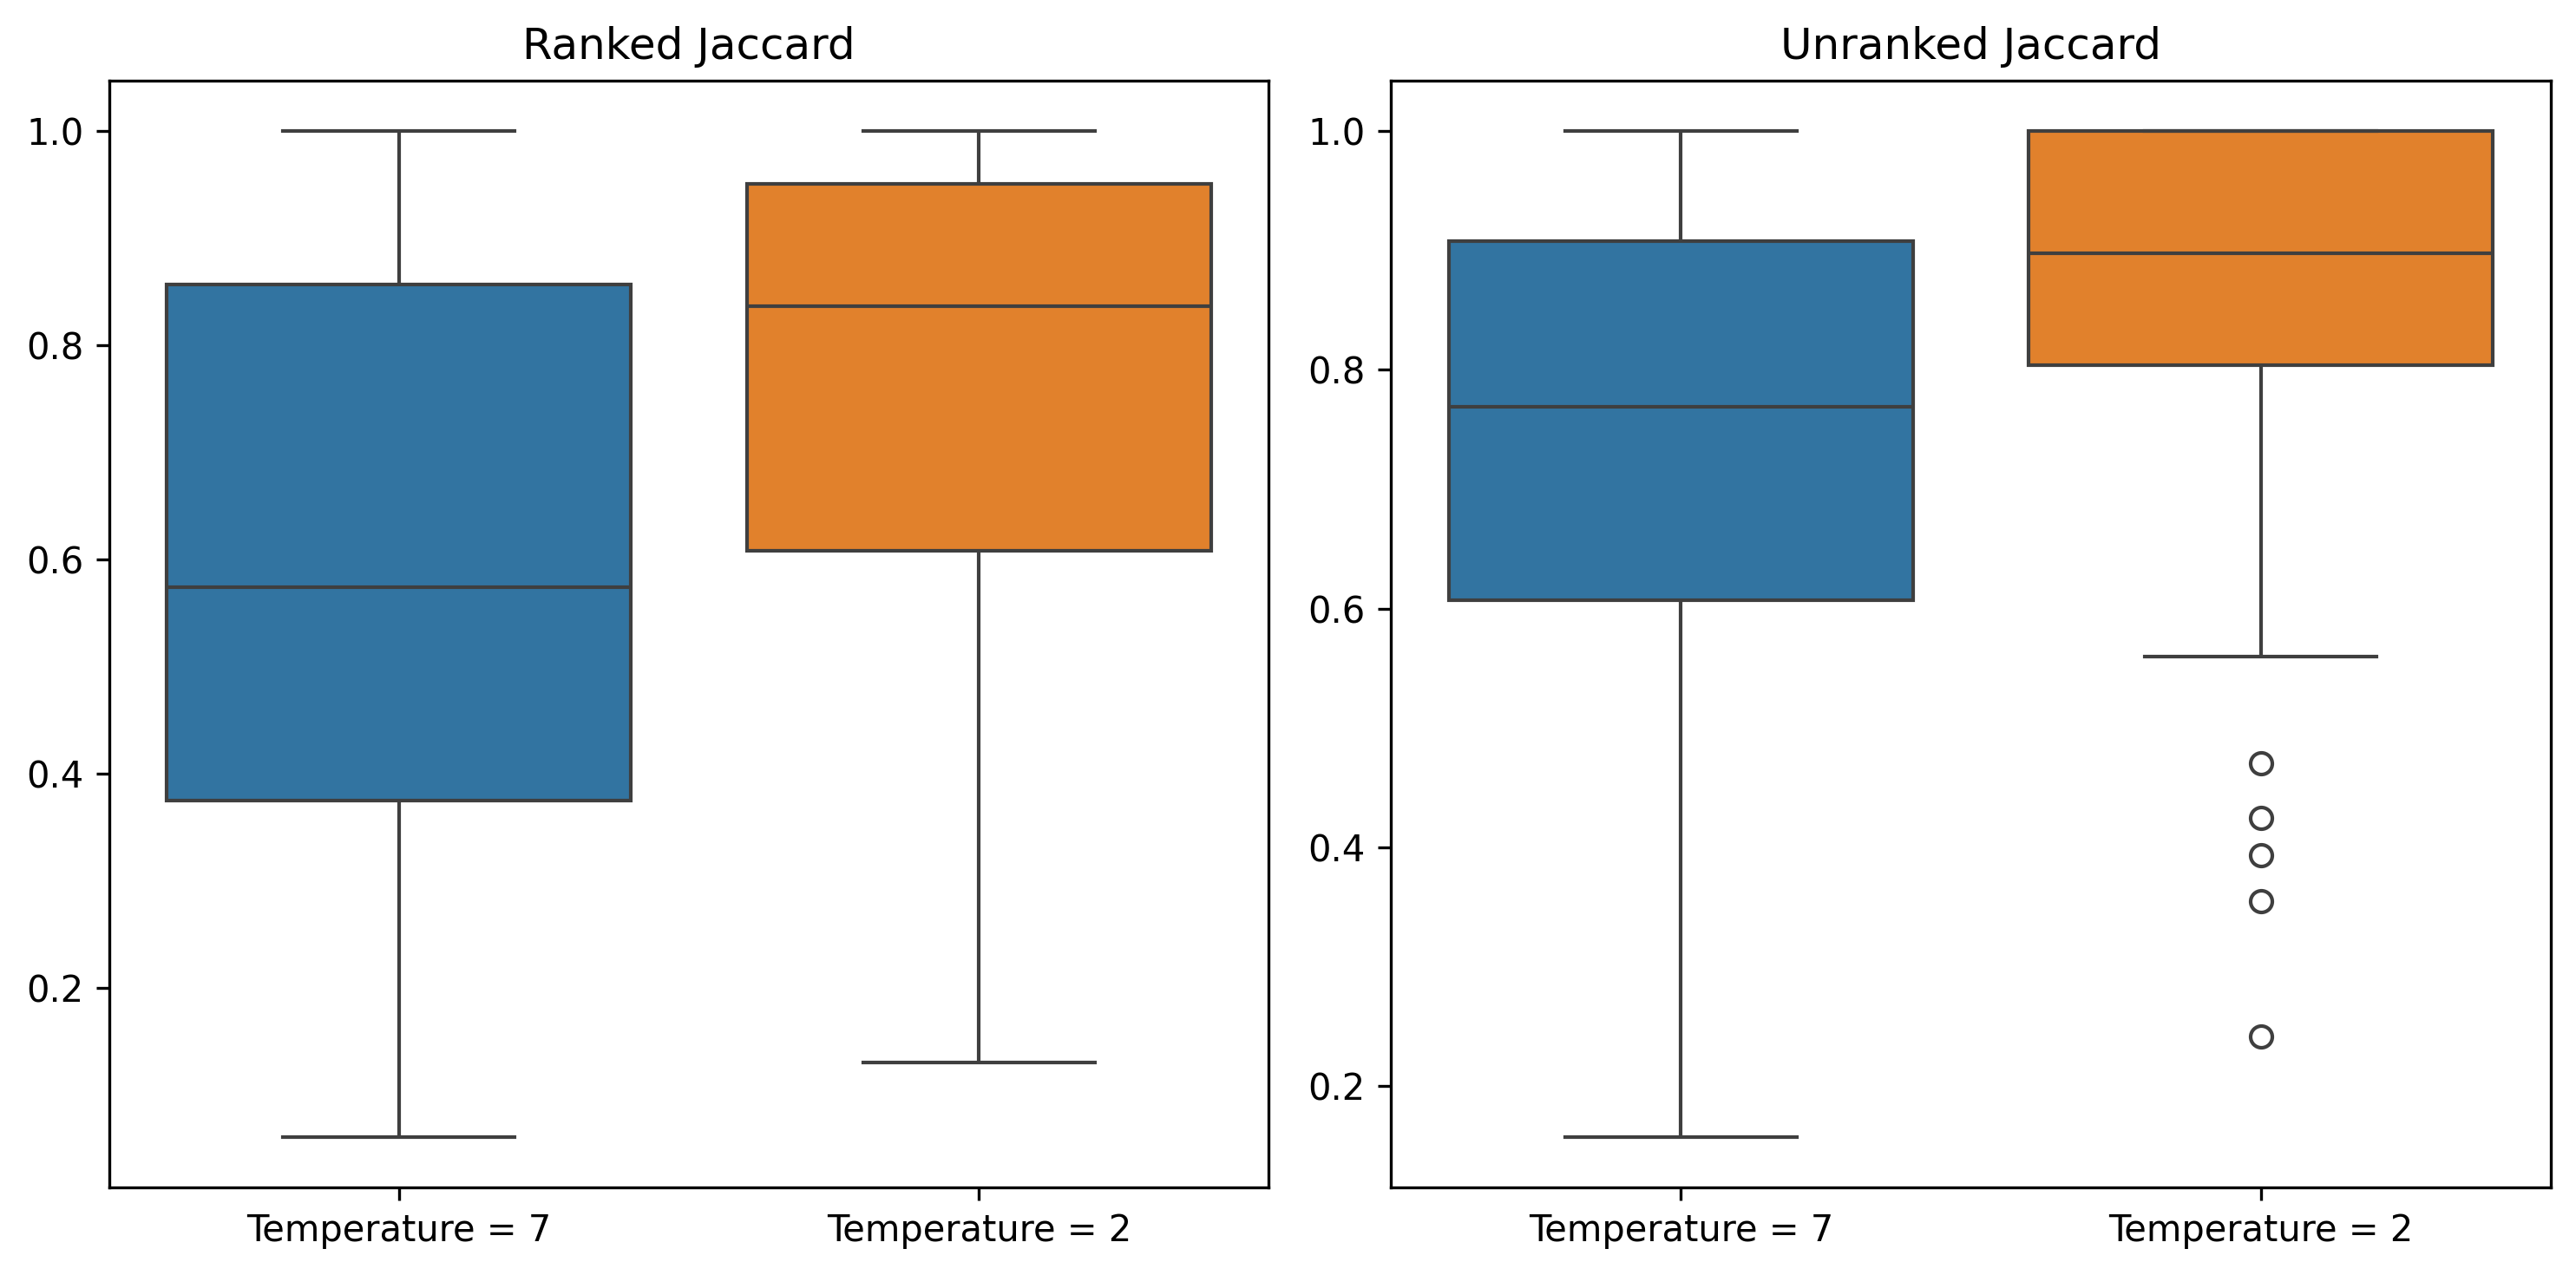

In [82]:
# create a new df with jaccard ranked from objective and subjective and jaccard unranked from objective and subjective
df_ranked = pd.DataFrame()
df_ranked["Temperature = 7"] = df_objective["Jaccard Ranked"]
df_ranked["Temperature = 2"] = df_test["Jaccard Ranked"]

df_unranked = pd.DataFrame()
df_unranked["Temperature = 7"] = df_objective["Jaccard Unranked"]
df_unranked["Temperature = 2"] = df_test["Jaccard Unranked"]

# boxplot of the ranked and unranked jaccard similarities for the two temperatures
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=300)
sns.boxplot(data=df_ranked, ax=ax[0])
ax[0].set_title("Ranked Jaccard")
sns.boxplot(data=df_unranked, ax=ax[1])
ax[1].set_title("Unranked Jaccard")

plt.tight_layout()
plt.savefig("temperature_boxplot.png")
plt.show()

In [66]:
df_means['Subjective']

Jaccard Ranked      0.333632
Jaccard Unranked    0.596564
Name: Subjective, dtype: float64